In [ ]:
import numpy as np
from scipy.stats import *
from sympy import *
from IPython.display import Math

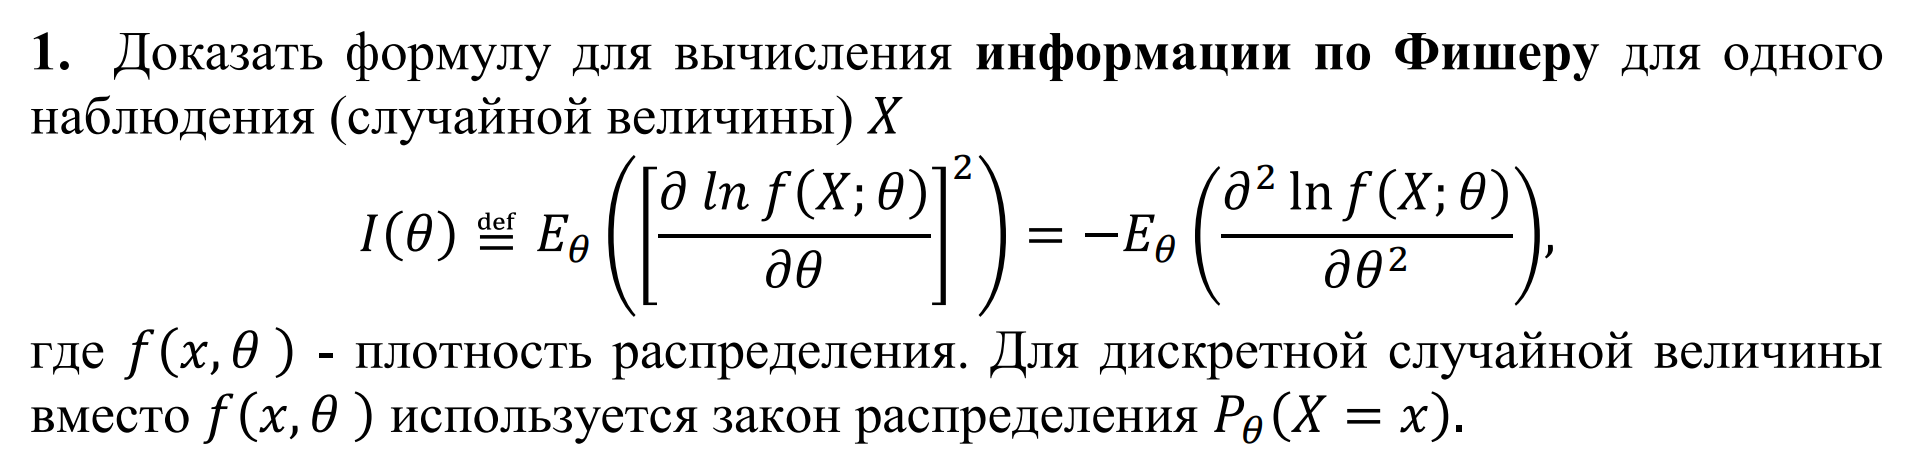

In [2]:
# Объявляем символы
theta = Symbol('theta', real=True)  # параметр
x = Symbol('x', real=True)          # случайная величина
f = Function('f')(x, theta)         # плотность распределения

# 1. Логарифм плотности
log_f = log(f)

# 2. Первая производная логарифма
d_log_f = diff(log_f, theta)

# 3. Вторая производная логарифма
d2_log_f = diff(d_log_f, theta)

# 4. Проверяем выражение для информации Фишера
I_theta = simplify(-integrate(d2_log_f * f, (x, -oo, oo)))  # Вычисляем интеграл
I_theta.expand()

-Integral(Derivative(f(x, theta), (theta, 2)) - Derivative(f(x, theta), theta)**2/f(x, theta), (x, -oo, oo))

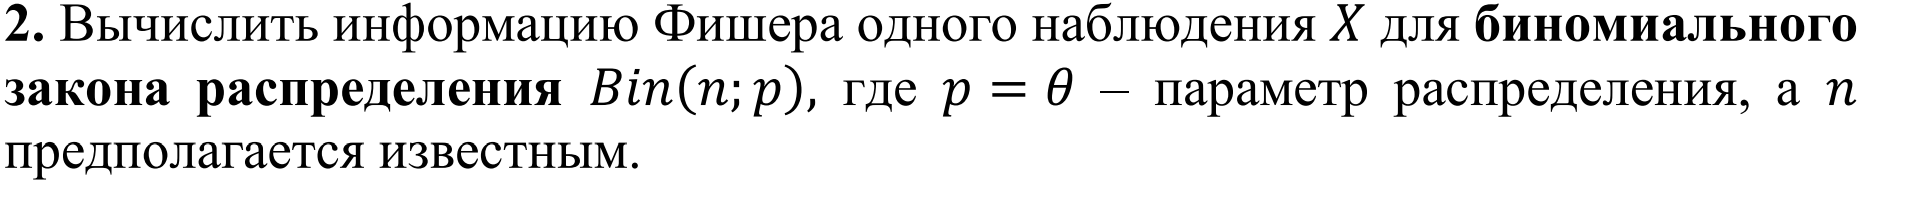

In [3]:
# Объявляем символы
n = Symbol('n', positive=True, integer=True)  # число испытаний
p = Symbol('p', real=True, positive=True)     # вероятность успеха (theta)
x = Symbol('x', integer=True, nonnegative=True)  # число успехов

# Плотность биномиального распределения
f_binomial = binomial(n, x) * (p**x) * ((1 - p)**(n - x))

# Логарифм плотности
log_f_binomial = log(f_binomial)

# Первая производная логарифма
d_log_f_binomial = diff(log_f_binomial, p)

# Квадрат первой производной
d_log_f_binomial_squared = d_log_f_binomial**2

# Вторая производная логарифма
d2_log_f_binomial = diff(d_log_f_binomial, p)

'''# Информация Фишера через первую производную
I_theta_1 = simplify(summation(d_log_f_binomial_squared * f_binomial, (x, 0, n)))

# Информация Фишера через вторую производную
I_theta_2 = simplify(-summation(d2_log_f_binomial * f_binomial, (x, 0, n)))'''

'# Информация Фишера через первую производную\nI_theta_1 = simplify(summation(d_log_f_binomial_squared * f_binomial, (x, 0, n)))\n\n# Информация Фишера через вторую производную\nI_theta_2 = simplify(-summation(d2_log_f_binomial * f_binomial, (x, 0, n)))'

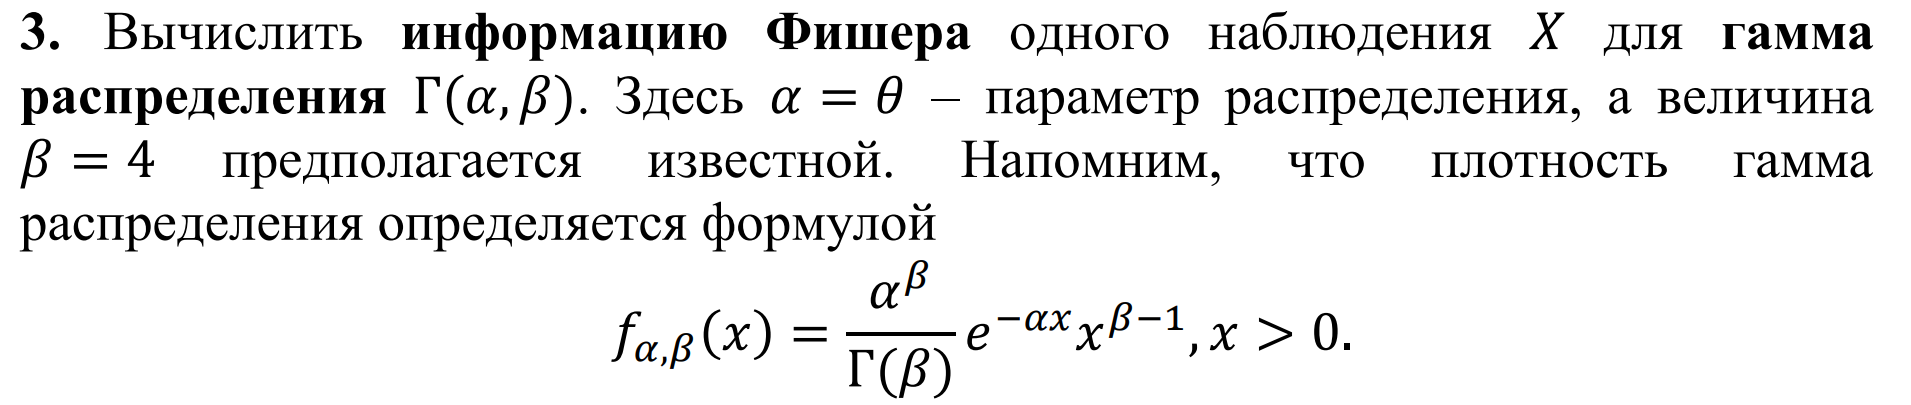

In [4]:
# Определяем символы
alpha, beta, x = symbols('alpha beta x', positive=True, real=True)

# Условие: beta = 4 (известная величина)
beta_value = 4

# Плотность гамма распределения
f_gamma = (beta_value**alpha) * (x**(alpha - 1)) * (exp(-beta_value * x)) / gamma(alpha)

# Логарифм плотности
log_f_gamma = log(f_gamma)

# Первая производная логарифма
d_log_f_gamma = diff(log_f_gamma, alpha)

# Квадрат первой производной
d_log_f_gamma_squared = d_log_f_gamma**2

# Вторая производная логарифма
d2_log_f_gamma = diff(d_log_f_gamma, alpha)

# Информация Фишера через первую производную
I_alpha_1 = simplify(integrate(d_log_f_gamma_squared * f_gamma, (x, 0, oo)))

# Информация Фишера через вторую производную
I_alpha_2 = simplify(-integrate(d2_log_f_gamma * f_gamma, (x, 0, oo)))

In [5]:
I_alpha_1.simplify()

(-2**(2*alpha + 2)*log(2)**2 + 4**alpha*(-log(256)*polygamma(0, alpha) + polygamma(1, alpha) + 4*log(2)**2) + log(2**(8*2**(2*alpha)))*polygamma(0, alpha))/4**alpha

In [6]:
I_alpha_2

polygamma(1, alpha)

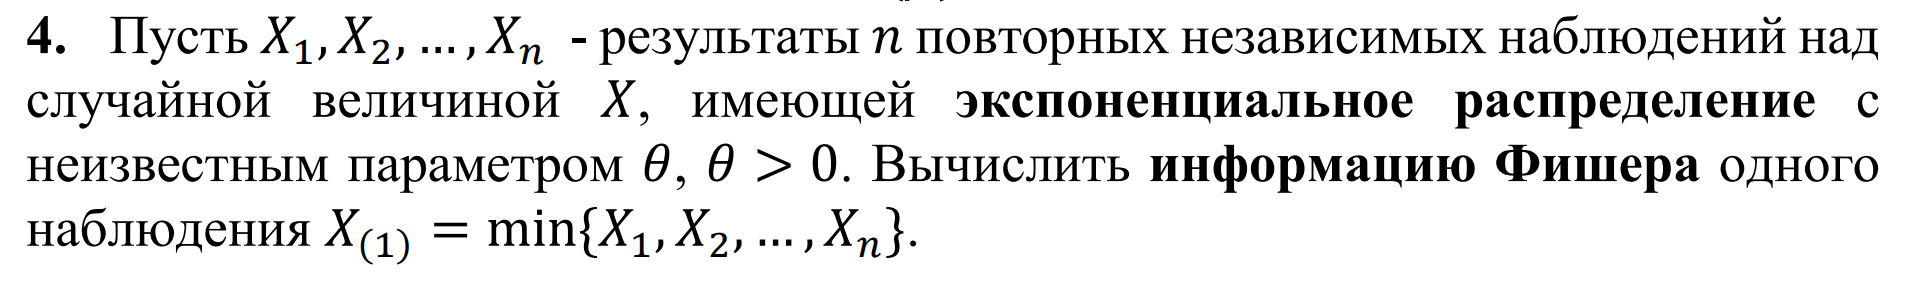

In [7]:
# Определяем символы
theta, x, n = symbols('theta x n', positive=True, real=True)

# Плотность экспоненциального распределения для одного наблюдения
f_exp = (1 / theta) * exp(-x / theta)

# Плотность для минимума n независимых наблюдений
f_min = n * f_exp * (1 - integrate(f_exp, (x, 0, x)))**(n - 1)

# Логарифм плотности для минимума
log_f_min = simplify(log(f_min))

# Первая производная логарифма
d_log_f_min = diff(log_f_min, theta)

# Квадрат первой производной
d_log_f_min_squared = d_log_f_min**2

# Информация Фишера через первую производную
I_theta = simplify(integrate(d_log_f_min_squared * f_min, (x, 0, oo)))
I_theta

theta**(-2)

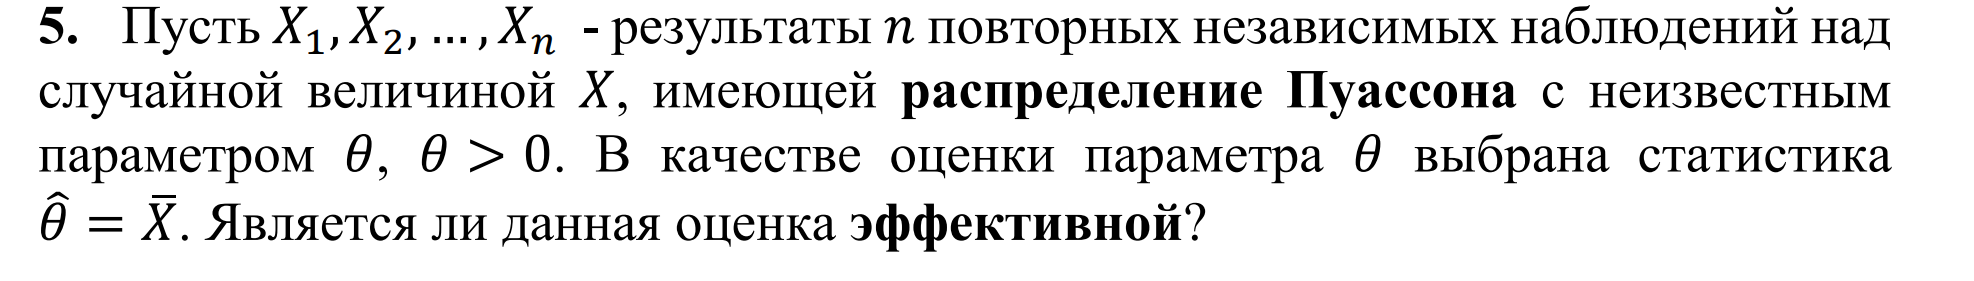

In [8]:
from sympy import symbols, summation, exp, factorial, simplify

# Определяем символы
theta, n = symbols('theta n', positive=True, real=True)

# Плотность распределения Пуассона для одного наблюдения X
x = symbols('x', integer=True, nonnegative=True)
f_poisson = (theta**x * exp(-theta)) / factorial(x)

# Математическое ожидание для одного наблюдения
E_X = summation(x * f_poisson, (x, 0, float('inf')))

# Дисперсия для одного наблюдения
Var_X = summation((x - E_X)**2 * f_poisson, (x, 0, float('inf')))

# Математическое ожидание для X̄ (среднее из n наблюдений)
E_X_bar = E_X

# Дисперсия для X̄ (среднее из n наблюдений)
Var_X_bar = Var_X / n

# Информация Фишера для распределения Пуассона


# Производная логарифма плотности
log_f_poisson_derivative = (x / theta) - 1

# Квадрат производной
squared_derivative = log_f_poisson_derivative**2

# Информация Фишера (математическое ожидание квадрата производной)
I_theta = simplify(summation(squared_derivative * f_poisson, (x, 0, float('inf'))))

# Нижняя граница дисперсии (Cramer-Rao Bound)
Cramer_Rao_bound = 1 / (n * I_theta)

# Проверка, что дисперсия X̄ достигает нижней границы
display(Cramer_Rao_bound, simplify(Var_X_bar))

theta/n

theta/n

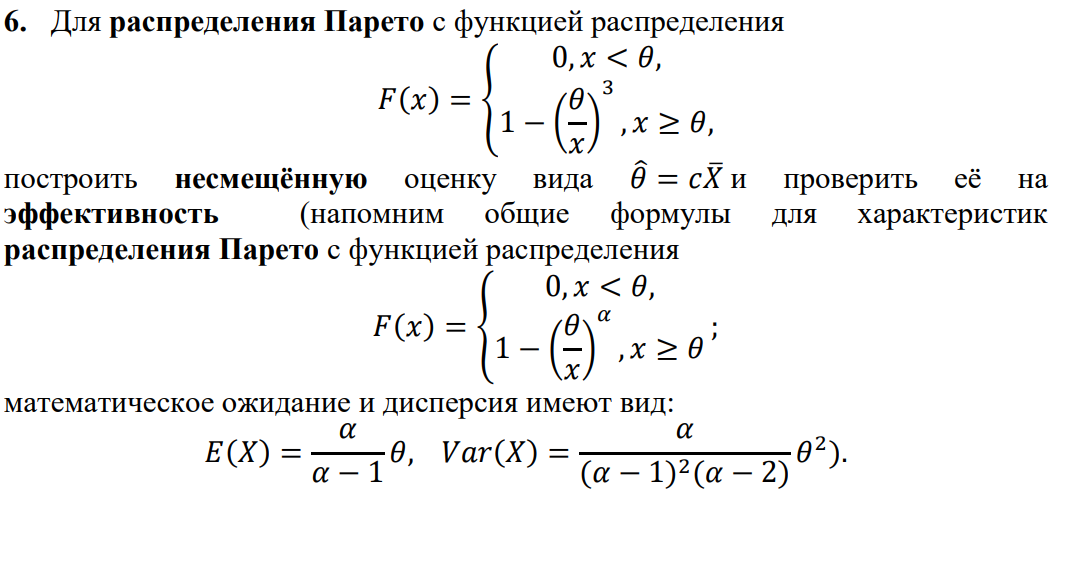

In [9]:
from sympy import symbols, Eq, diff, factorial, summation, simplify

# Определяем символы
theta, alpha, n = symbols('theta alpha n', positive=True, real=True)

# Плотность распределения Парето
x = symbols('x', positive=True, real=True)
f_pareto = (alpha * theta**alpha) / x**(alpha + 1)

# Логарифм плотности
log_f_pareto = simplify(simplify(f_pareto).subs(f_pareto, f_pareto))

# Первая производная по theta
log_f_pareto_derivative = diff(log_f_pareto, theta)

# Вторая производная по theta
log_f_pareto_second_derivative = diff(log_f_pareto_derivative, theta)

# Информация Фишеры
I_theta = -simplify(log_f_pareto_second_derivative)
simplified_I_theta = simplify(I_theta)

# Выводим результат
simplified_I_theta.subs({alpha:3})

-18*theta/x**4

In [10]:
from sympy import symbols, Eq, solve, summation, factorial, simplify

# Определяем символы
theta, alpha, n = symbols('theta alpha n', positive=True, real=True)

# Математическое ожидание для распределения Парето: E(X) = (alpha / (alpha - 1)) * theta
E_X = (alpha / (alpha - 1)) * theta

# Математическое ожидание для выборочного среднего: E(X̄) = E(X)
E_X_bar = E_X

# Ожидаемая несмещенная оценка: E(c * X̄) = c * E(X̄) = theta
c = symbols('c')

# Условие для несмещенности: E(c * X̄) = theta
eq = Eq(c * E_X_bar, theta)

# Решаем для c
c_value = solve(eq, c)[0]

# Несмещенная оценка для theta
theta_hat = c_value * E_X_bar

# Выводим результат
simplified_theta_hat = simplify(theta_hat)

# Вычисление информации Фишера для распределения Парето
# Информация Фишера: I(theta) = alpha / theta^2
I_theta = simplified_I_theta

# Нижняя граница дисперсии (Cramér-Rao Bound)
Cramer_Rao_bound = 1 / (n * I_theta)

# Дисперсия для X̄ (выборочного среднего)
Var_X_bar = (alpha / ((alpha - 1)**2 * (alpha - 2))) * theta**2 / n

# Проверка на эффективность: сравниваем дисперсию X̄ с нижней границей
is_efficient = Eq(Var_X_bar, Cramer_Rao_bound)

# Выводим результаты
display(simplified_theta_hat, simplified_I_theta.subs({alpha:3}), Cramer_Rao_bound.subs({alpha:3}), Var_X_bar.simplify().subs({alpha:3}), is_efficient.simplify().subs({alpha:3}))

theta

-18*theta/x**4

-x**4/(18*n*theta)

3*theta**2/(4*n)

False